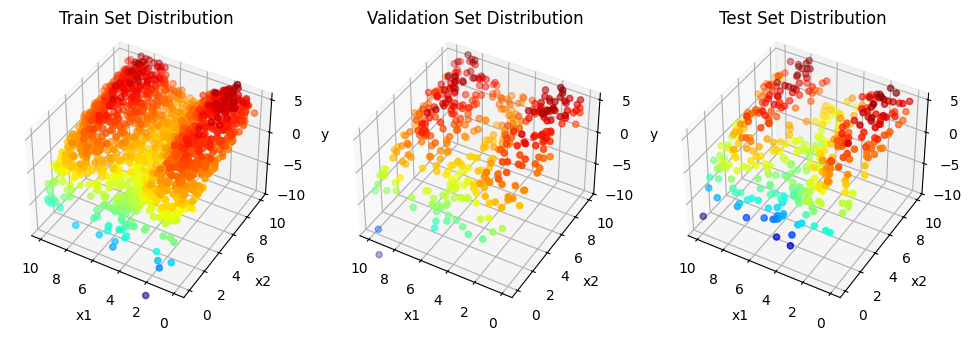

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# ====== Generating Dataset ====== #
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e
# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

2. Hypothesis Define (Model Define)  
Linear Regression 시에 활용하는 H(x) = Wx + b를 파이토치로 구현할 때는 단순하게 nn.Linear 모듈을 하나 만들어주면 됩니다. 이 때in_features는 x의 차원이고, out_features는 y의 차원입니다.

In [2]:
import torch
import torch.nn as nn

class MLPModel(nn.Module):
    def __init__(self, in_feat, out_feat, hidden_feat, linear_num): 
        super(MLPModel, self).__init__()
        self.linear_num = linear_num
        self.linear1 = nn.Linear(in_features=in_feat, out_features=hidden_feat)
        self.linear_mid = nn.Linear(in_features=hidden_feat, out_features=hidden_feat)
        self.linear2 = nn.Linear(in_features=hidden_feat, out_features=out_feat)
        self.relu = nn.ReLU()

    def acting(self, x):
        x = self.linear_mid(x)
        x = self.relu(x)
        return x
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        for i in range(self.linear_num):
            x = self.acting(x)
        x = self.linear2(x)
        return x

In [3]:
reg_loss = nn.MSELoss()

기존코드에서 그래프를 그리는 부분에 오류가 지속적 발생하였다.  
원인은 c인자와 x,y의 크기가 일치하지 않아서였으므로,  
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')  
ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y.squeeze(), c=pred_y.squeeze(), cmap='jet')  
ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y.squeeze(), c=pred_y.squeeze(), cmap='jet')  
로 변경하여 오류를 해결하였다.

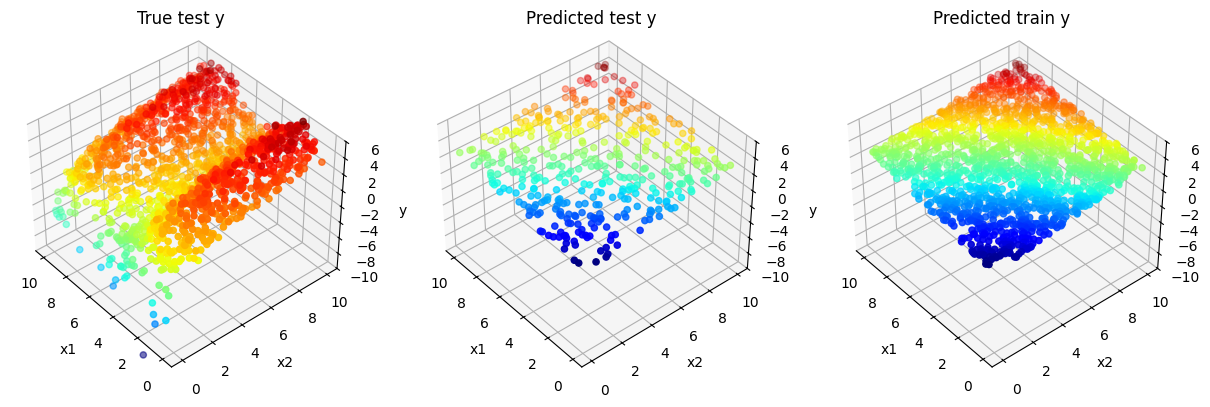

0 tensor(5.5804, grad_fn=<MseLossBackward0>)


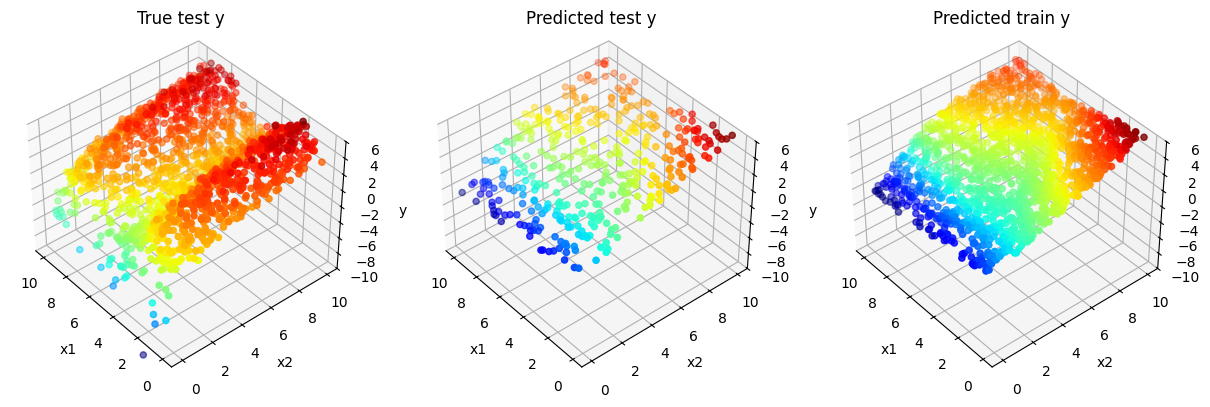

200 tensor(2.4329, grad_fn=<MseLossBackward0>)


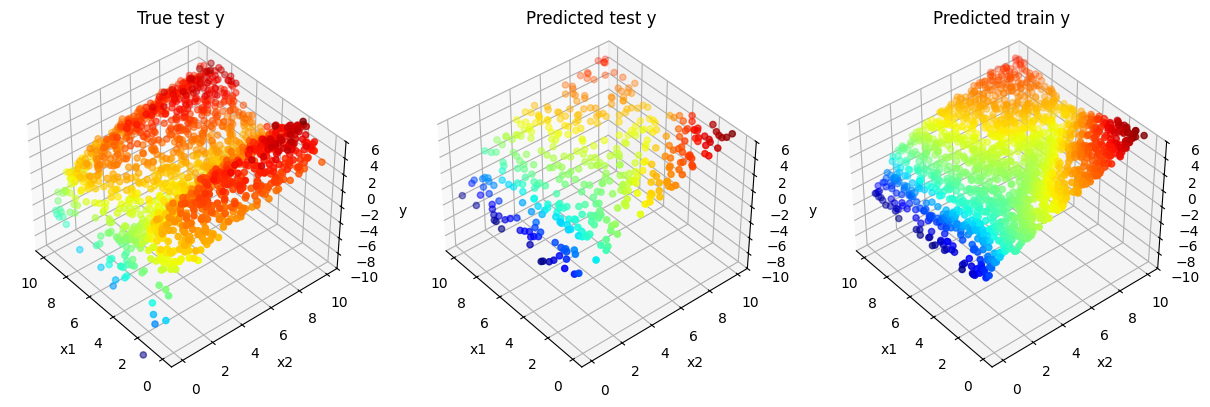

400 tensor(2.0643, grad_fn=<MseLossBackward0>)


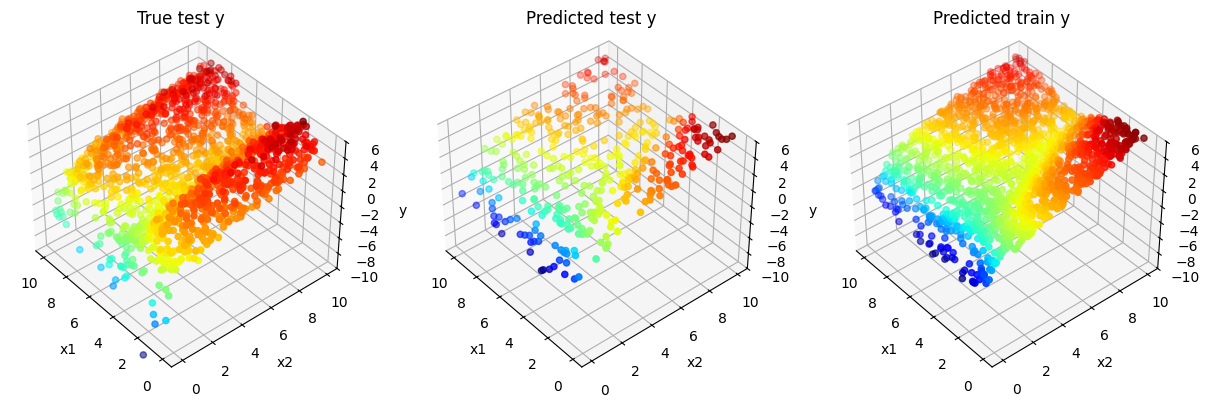

600 tensor(1.8895, grad_fn=<MseLossBackward0>)


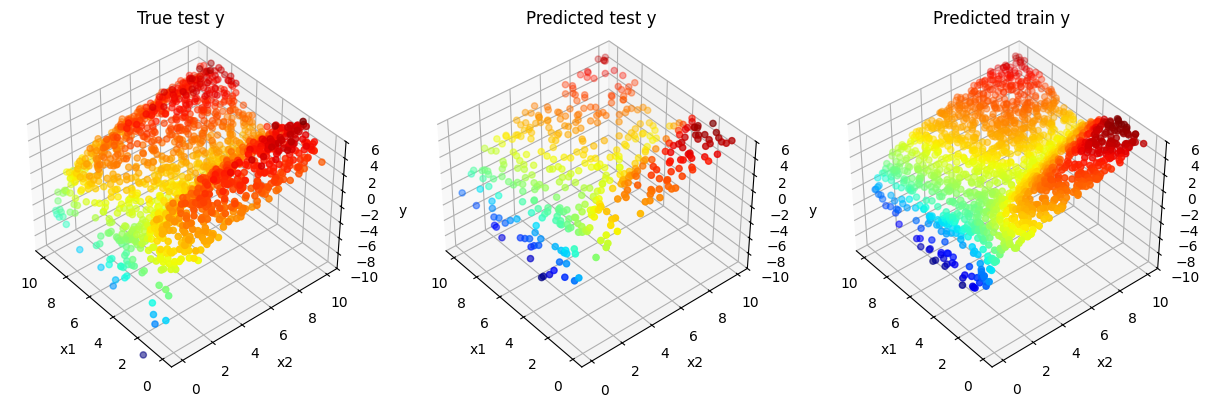

800 tensor(1.6752, grad_fn=<MseLossBackward0>)


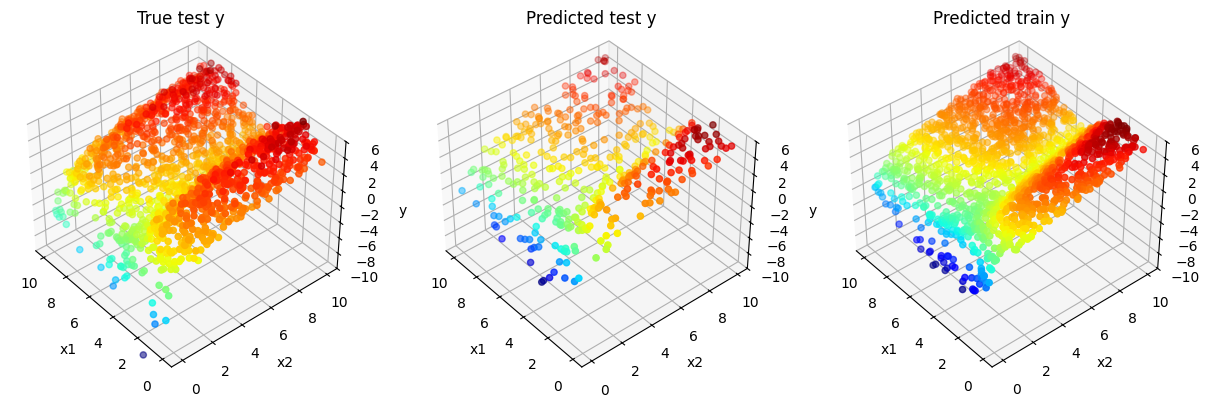

1000 tensor(1.5955, grad_fn=<MseLossBackward0>)


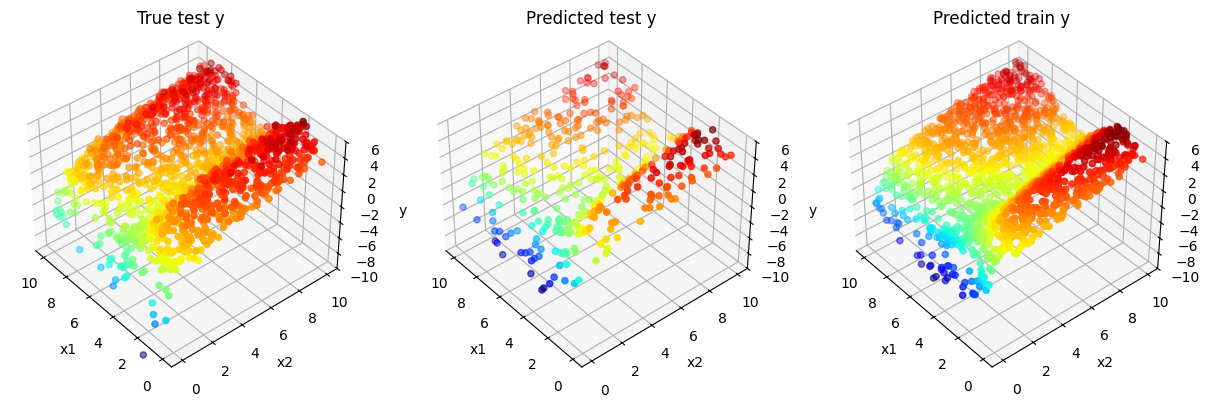

1200 tensor(1.3352, grad_fn=<MseLossBackward0>)


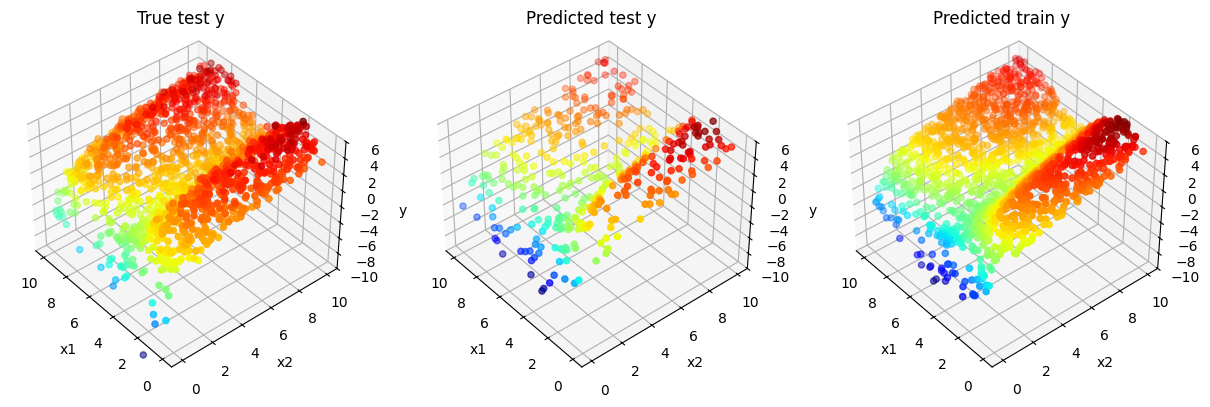

1400 tensor(1.0385, grad_fn=<MseLossBackward0>)


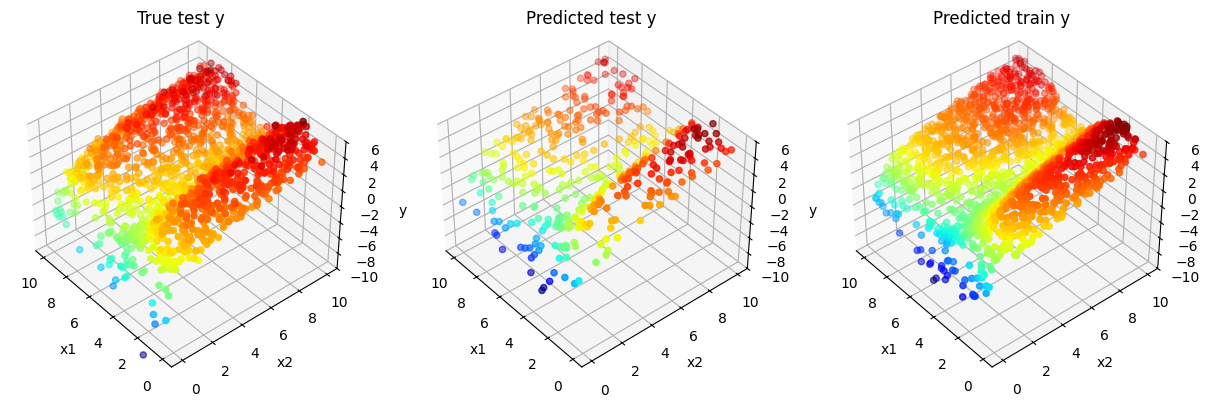

1600 tensor(0.9937, grad_fn=<MseLossBackward0>)


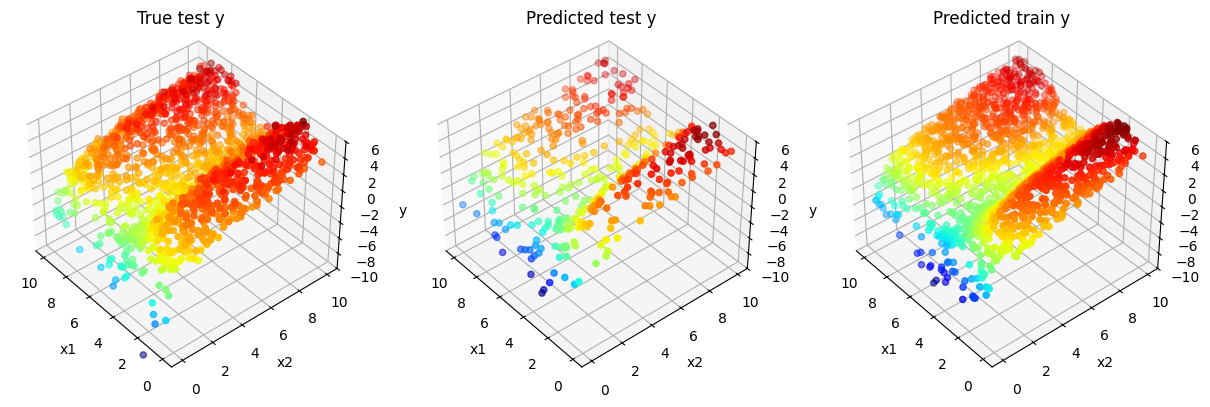

1800 tensor(0.8949, grad_fn=<MseLossBackward0>)


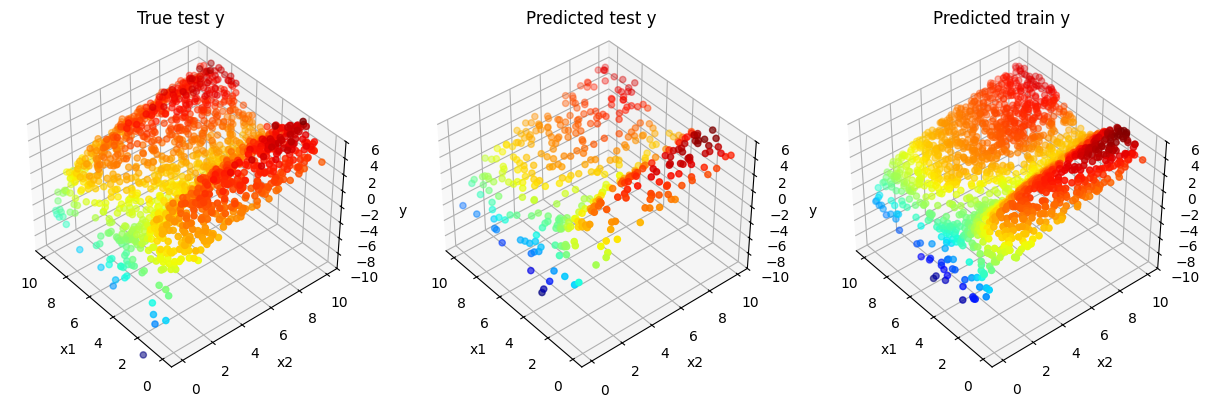

2000 tensor(1.2762, grad_fn=<MseLossBackward0>)


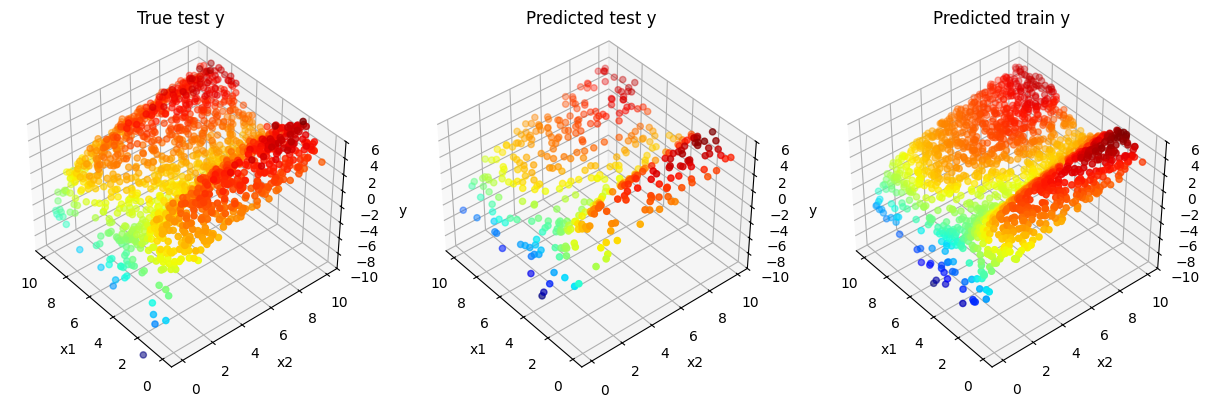

2200 tensor(1.1677, grad_fn=<MseLossBackward0>)


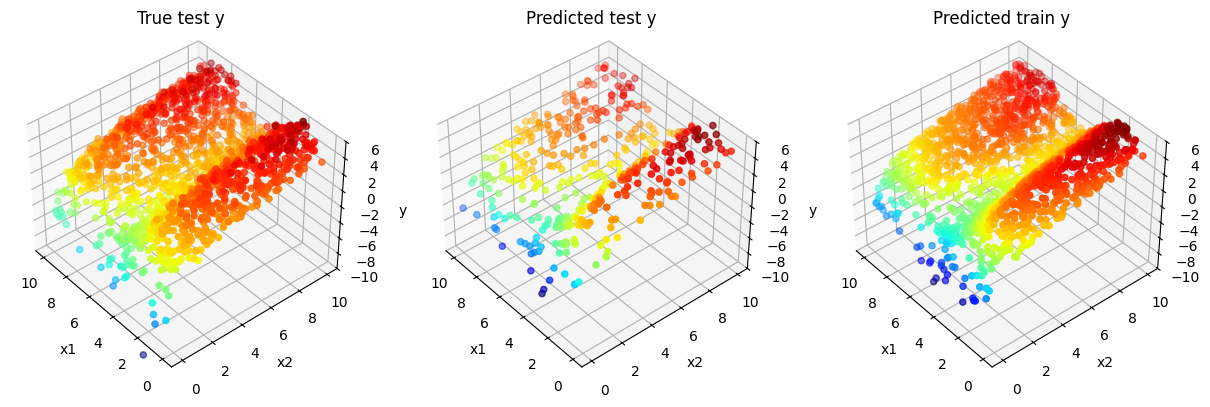

2400 tensor(0.9709, grad_fn=<MseLossBackward0>)


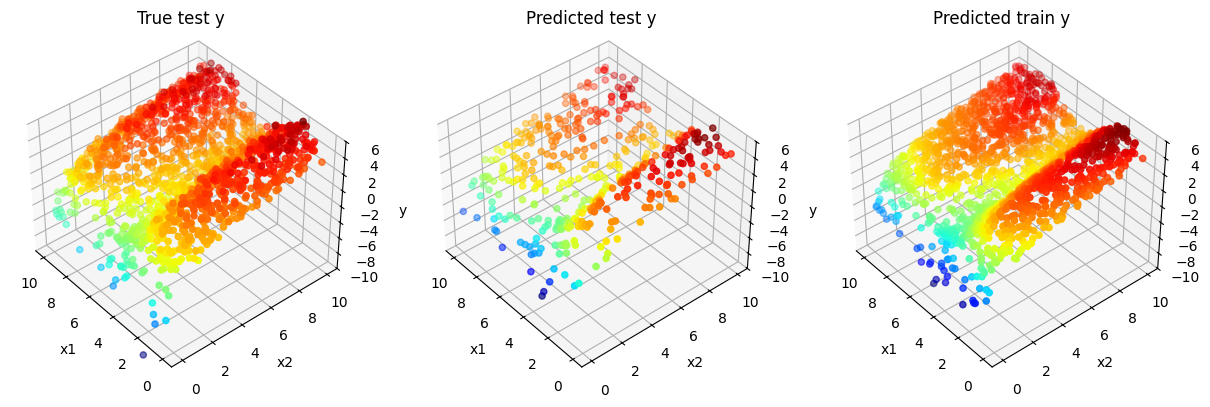

2600 tensor(0.9707, grad_fn=<MseLossBackward0>)


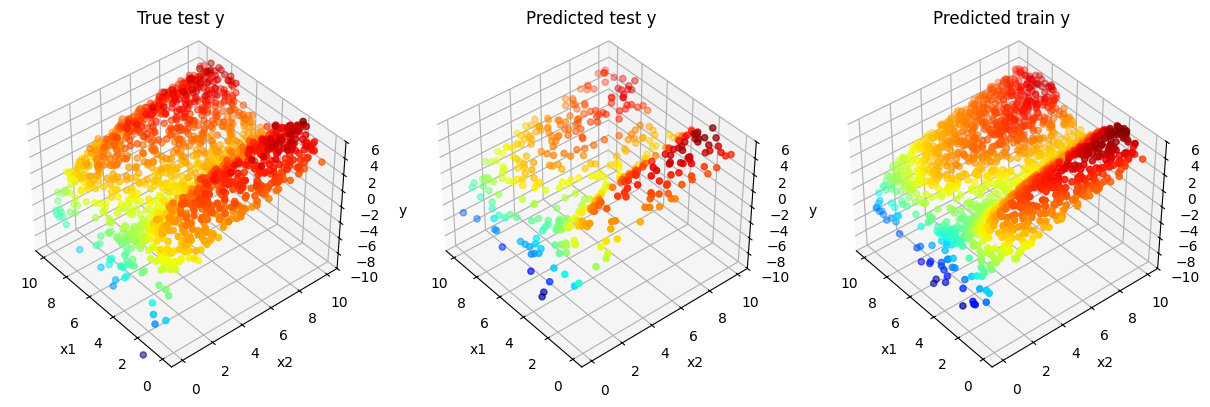

2800 tensor(1.0169, grad_fn=<MseLossBackward0>)


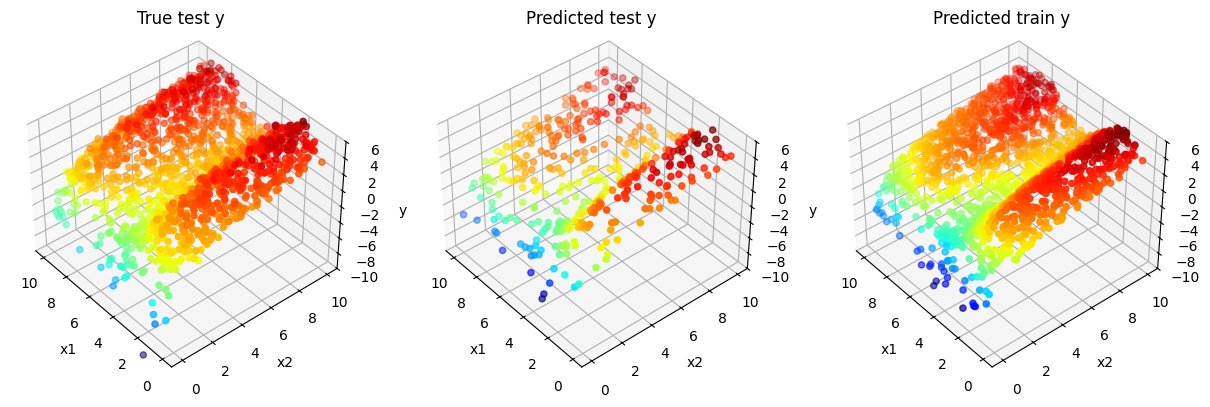

3000 tensor(0.9384, grad_fn=<MseLossBackward0>)


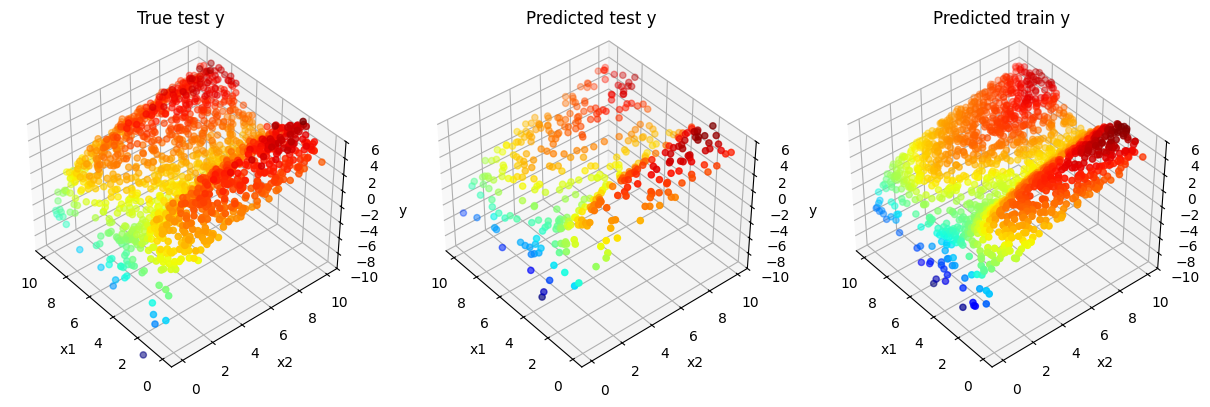

3200 tensor(0.8515, grad_fn=<MseLossBackward0>)


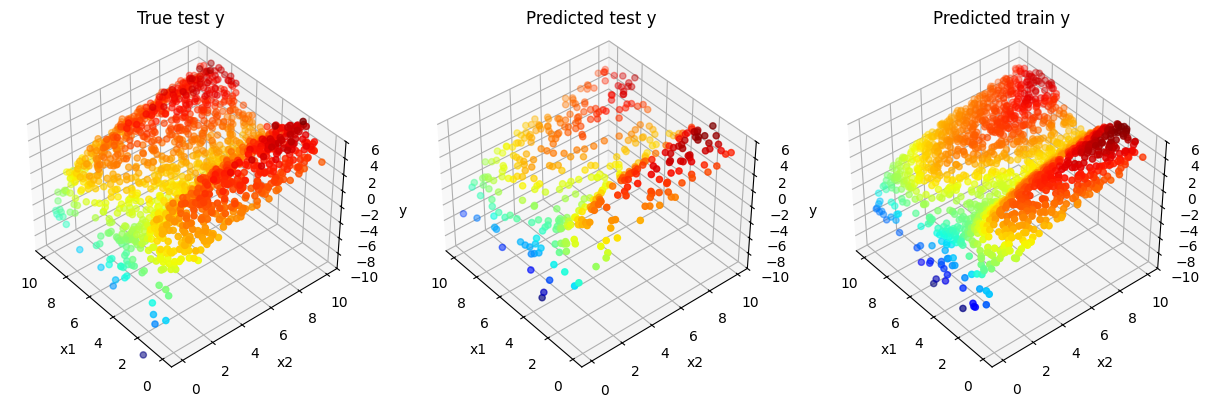

3400 tensor(0.8700, grad_fn=<MseLossBackward0>)


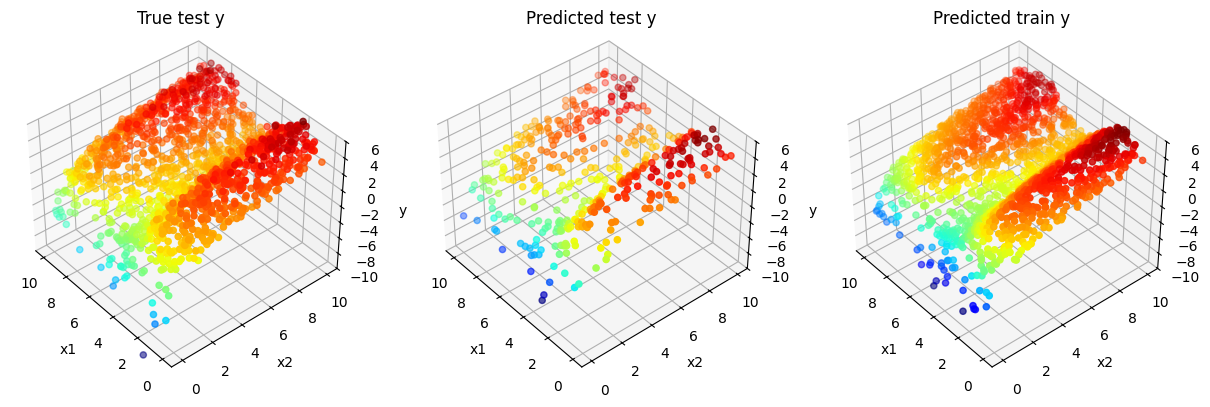

3600 tensor(0.9239, grad_fn=<MseLossBackward0>)


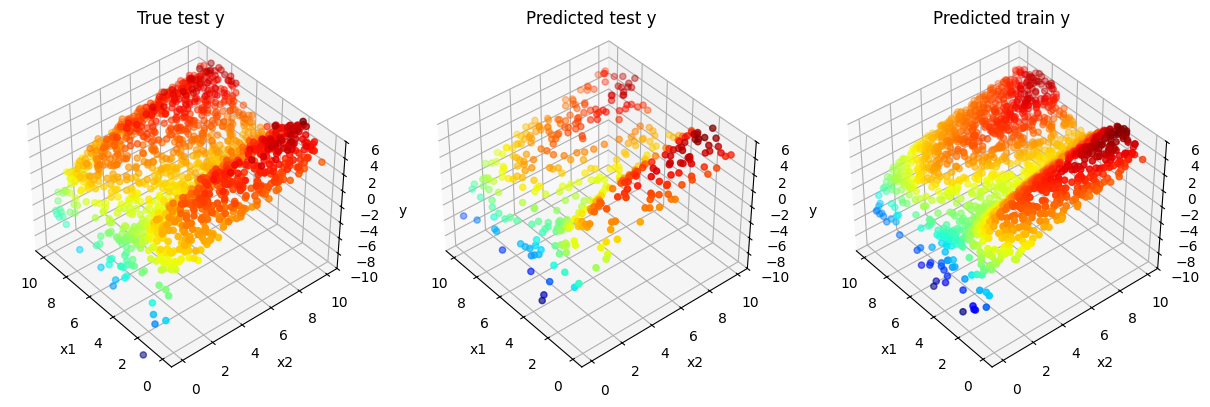

3800 tensor(0.8411, grad_fn=<MseLossBackward0>)


In [4]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

model = MLPModel(2,1,200,2)
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

epoch = 4000
for i in range(epoch):
    model.train()
    optimizer.zero_grad()
    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)
    
    loss = reg_loss(pred_y.squeeze(), true_y)
    loss.backward()
    optimizer.step()
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    
    if i % 200 == 0:
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y)
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y.squeeze(), c=pred_y.squeeze(), cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y.squeeze(), c=pred_y.squeeze(), cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

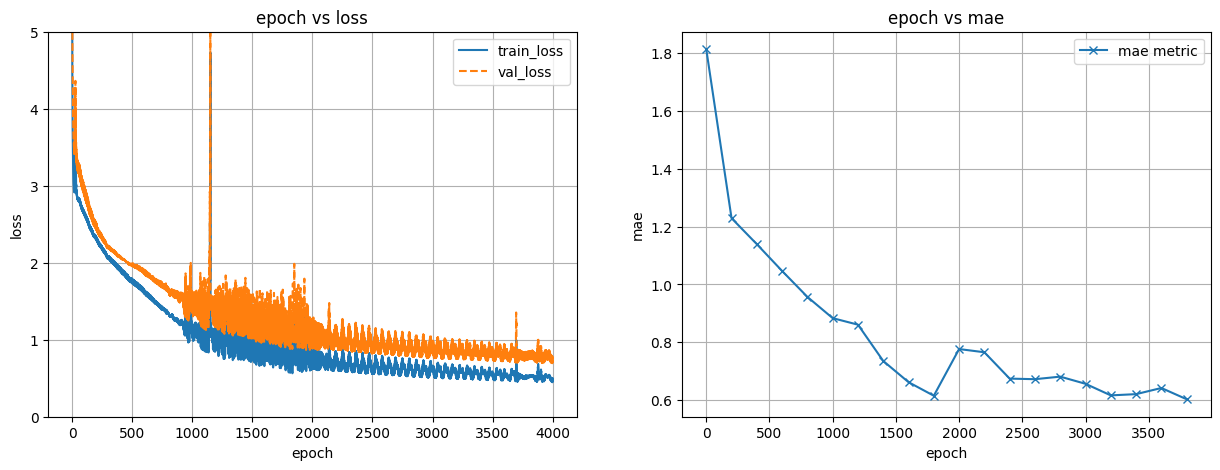

In [5]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()